# **Best-Selling Consoles and Their Best-Selling Games (EDA)**

## About the dataset

This dataset contains historical sales data for the best-selling game consoles of all time, along with their most popular game titles. It includes information on the year of release for each game, as well as the number of units sold in millions.


The dataset covers a wide range of gaming platforms, from classic consoles such as the NES and Atari 2600 to modern systems like the PlayStation 5 and Xbox Series X/S. For each console, we've identified the game that sold the most copies.


This dataset can be used for a variety of purposes, from analyzing the evolution of the video game industry over time to identifying trends in popular game genres. Researchers, journalists, and gaming enthusiasts alike may find this data useful for understanding the history and impact of gaming on popular culture.

**Sources:**
The data for this dataset was sourced from a variety of publicly available sales reports, gaming industry publications, and online databases. We have made every effort to ensure that the data is accurate and up-to-date, but please note that some discrepancies or errors may be present.

**Dataset extracted from Kaggle: [Link for the dataset](https://www.kaggle.com/datasets/tayyarhussain/best-selling-consoles-and-their-best-selling-games)**

## Importing the Dataset and first analysis

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
#Setting some color and style preferences for Seaborn

#Some options for palletes:
# ‘Accent’, ‘Accent_r’, ‘Blues’, ‘Blues_r’, ‘BrBG’, ‘BrBG_r’, ‘BuGn’, ‘BuGn_r’, ‘BuPu’, ‘BuPu_r’, 
# ‘CMRmap’, ‘CMRmap_r’, ‘Dark2’, ‘Dark2_r’, ‘GnBu’, ‘GnBu_r’,  ‘Greens’, ‘Greens_r’, ‘Greys’, ‘Greys_r’, ‘OrRd’, 
# ‘OrRd_r’, ‘Oranges’, ‘Oranges_r’,  ‘PRGn’, ‘PRGn_r’, ‘Paired’, ‘Paired_r’, ‘Pastel1’, etc

sns.set_palette('turbo',10)
sns.set_style('darkgrid')

[Link for pallete colors and style](https://www.geeksforgeeks.org/seaborn-color-palette/)

In [136]:
games = pd.read_csv('/home/daniel-ubuntu/Desktop/EDA/best-selling game consoles and their best-selling games.csv')
games.head(9)

,Console,Most Sold Game,Year of Release (Game),Units Sold (in millions),Extra Information
0,PlayStation 2,Grand Theft Auto: San Andreas,2004,17.33,NaN
1,Nintendo DS,Nintendogs,2005,24.67,NaN
2,Nintendo Switch,Mario Kart 8 Deluxe,2017,52.00,NaN
3,Game Boy,Tetris,1989,35.00,NaN
4,Game Boy Color,Pokemon Gold/Silver/Crystal (1999-2000),1999,23.10,NaN
5,PlayStation 4,Grand Theft Auto V,2013,20.00,NaN
6,PlayStation,Gran Turismo,1997,10.85,NaN
7,Wii,Wii Sports,2006,82.88,NaN
8,PlayStation 3,Grand Theft Auto V,2013,21.30,NaN


In [137]:
games.dtypes

Console                      object
Most Sold Game               object
Year of Release (Game)        int64
Units Sold (in millions)    float64
Extra Information            object
dtype: object

In [138]:
#The only column with numeric values (it wouldn't make sense work with the 'Year of Realease' column in this case)
games.describe()['Units Sold (in millions)']

count    51.000000
mean     10.538824
std      15.327422
min       0.330000
25%       1.050000
50%       5.500000
75%      15.110000
max      82.880000
Name: Units Sold (in millions), dtype: float64

In [139]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Console                   51 non-null     object 
 1   Most Sold Game            51 non-null     object 
 2   Year of Release (Game)    51 non-null     int64  
 3   Units Sold (in millions)  51 non-null     float64
 4   Extra Information         13 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.1+ KB


In [140]:
#Exploring more the 'Extra Information' column
games['Extra Information'].value_counts()
#Games with estimated units sold values

Extra Information
1 million+ (estimated)     6
1.5 million (estimated)    2
14 million +(estimated)    1
330,000 (estimated)        1
800,000 (estimated)        1
500,000 (estimated)        1
2 million (estimated)      1
Name: count, dtype: int64

In [141]:
#Which games are they?
games[games['Extra Information'].notna()]

,Console,Most Sold Game,Year of Release (Game),Units Sold (in millions),Extra Information
14,Xbox One,PlayerUnknown's Battlegrounds,2017,14.00,14 million +(estimated)
39,Intellivision,Astrosmash,1981,1.00,1 million+ (estimated)
40,Mega Drive (Brazilian),Sonic the Hedgehog 2,1992,1.50,1.5 million (estimated)
41,N-Gage,The Sims Bustin' Out,2004,1.00,1 million+ (estimated)
42,Sega CD,Sonic CD,1993,1.50,1.5 million (estimated)
43,ColecoVision,Donkey Kong,1982,1.00,1 million+ (estimated)
44,Magnavox Odyssey,Table Tennis,1972,0.33,"330,000 (estimated)"
45,PC Engine CD-ROM,Tengai Maky?: Ziria,1989,0.80,"800,000 (estimated)"
46,Atari 7800,Pole Position II,1983,1.00,1 million+ (estimated)
47,Atari Lynx,California Games,1989,0.50,"500,000 (estimated)"


##Plotting first graphs

In [142]:
#Plotting a graph with the top 10 most sold games
top_10_games = games.sort_values(by='Units Sold (in millions)', ascending=False).head(10)
top_10_games

,Console,Most Sold Game,Year of Release (Game),Units Sold (in millions),Extra Information
7,Wii,Wii Sports,2006,82.88,NaN
2,Nintendo Switch,Mario Kart 8 Deluxe,2017,52.00,NaN
13,NES/Famicom,Super Mario Bros.,1985,40.24,NaN
3,Game Boy,Tetris,1989,35.00,NaN
1,Nintendo DS,Nintendogs,2005,24.67,NaN
9,Xbox 360,Kinect Adventures!,2010,24.00,NaN
4,Game Boy Color,Pokemon Gold/Silver/Crystal (1999-2000),1999,23.10,NaN
8,PlayStation 3,Grand Theft Auto V,2013,21.30,NaN
12,Nintendo 3DS,Mario Kart 7,2011,20.79,NaN
15,SNES/Super Famicom,Super Mario World,1990,20.60,NaN


In [143]:
#Renaming this game because it has a very long name
top_10_games['Most Sold Game'][4] = 'Pokemon Gold/Silver/Crystal'

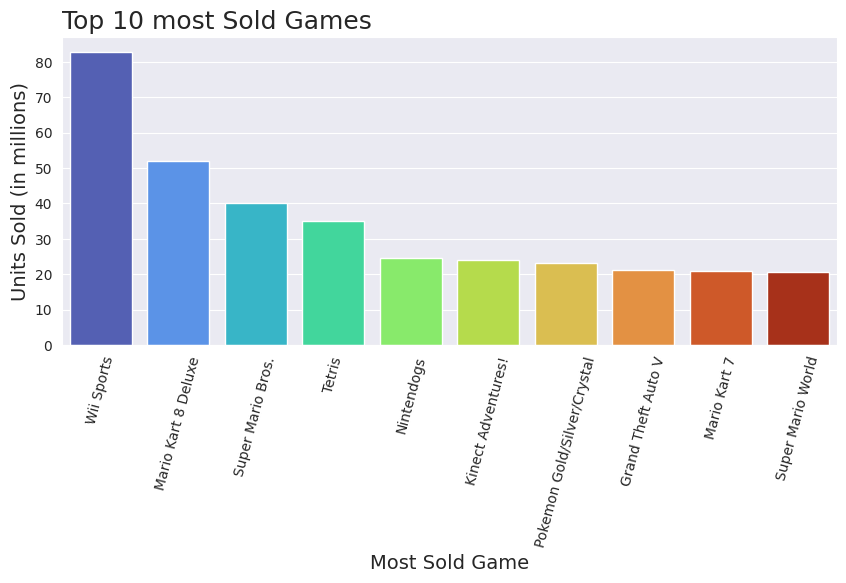

In [144]:
plt.figure(figsize=(10,4))
ax = sns.barplot(data = top_10_games, x='Most Sold Game', y='Units Sold (in millions)')
ax.set_title('Top 10 most Sold Games', fontsize=18, loc='left')
ax.set_ylabel('Units Sold (in millions)', fontsize=14)
ax.set_xlabel('Most Sold Game', fontsize=14)
plt.xticks(rotation =75)
ax=ax

As we can see, there are games that were the best selling game for more than one console, that's why we need to sum their Unit Sold values and plot a new graph to compare


In [145]:
games['Most Sold Game'].value_counts().head(6)

Most Sold Game
Super Mario Bros.             3
Grand Theft Auto V            2
Sonic the Hedgehog 2          2
Super Mario World             2
Alex Kidd in Miracle World    2
Astrosmash                    1
Name: count, dtype: int64

In [146]:
#Here is an example with the game 'Super Mario Bros.', that has been the most sold game in three different consoles
games.loc[games['Most Sold Game'] == 'Super Mario Bros.']

,Console,Most Sold Game,Year of Release (Game),Units Sold (in millions),Extra Information
13,NES/Famicom,Super Mario Bros.,1985,40.24,NaN
34,Famicom Disk System,Super Mario Bros.,1986,6.02,NaN
35,NES Classic Edition,Super Mario Bros.,1985,2.30,NaN


In [147]:
#Saving a new Df with the sum of the games that appered in more than one console
top_10_games_sum = games.groupby('Most Sold Game')['Units Sold (in millions)'].sum().reset_index().sort_values(by='Units Sold (in millions)',ascending=False).head(10)

#And updating the name of Pokemon again
top_10_games_sum['Most Sold Game'][23] = 'Pokemon Gold/Silver/Crystal'
top_10_games_sum

,Most Sold Game,Units Sold (in millions)
44,Wii Sports,82.88
17,Mario Kart 8 Deluxe,52.00
33,Super Mario Bros.,48.56
10,Grand Theft Auto V,41.30
40,Tetris,35.00
35,Super Mario World,26.10
19,Nintendogs,24.67
14,Kinect Adventures!,24.00
23,Pokemon Gold/Silver/Crystal,23.10
15,Mario Kart 7,20.79


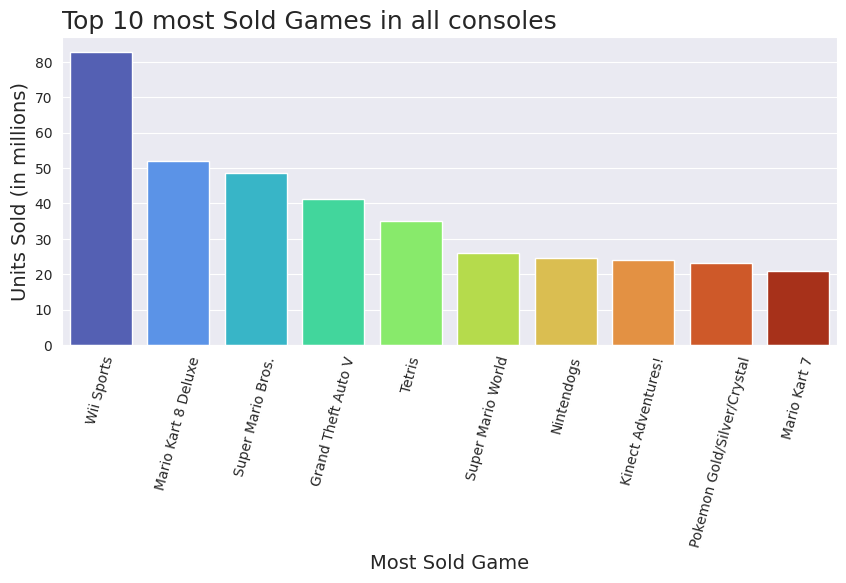

In [148]:
plt.figure(figsize=(10,4))
ax = sns.barplot(data = top_10_games_sum, x='Most Sold Game', y='Units Sold (in millions)')
ax.set_title('Top 10 most Sold Games in all consoles', fontsize=18, loc='left')
ax.set_ylabel('Units Sold (in millions)', fontsize=14)
ax.set_xlabel('Most Sold Game', fontsize=14)
plt.xticks(rotation =75)
ax=ax

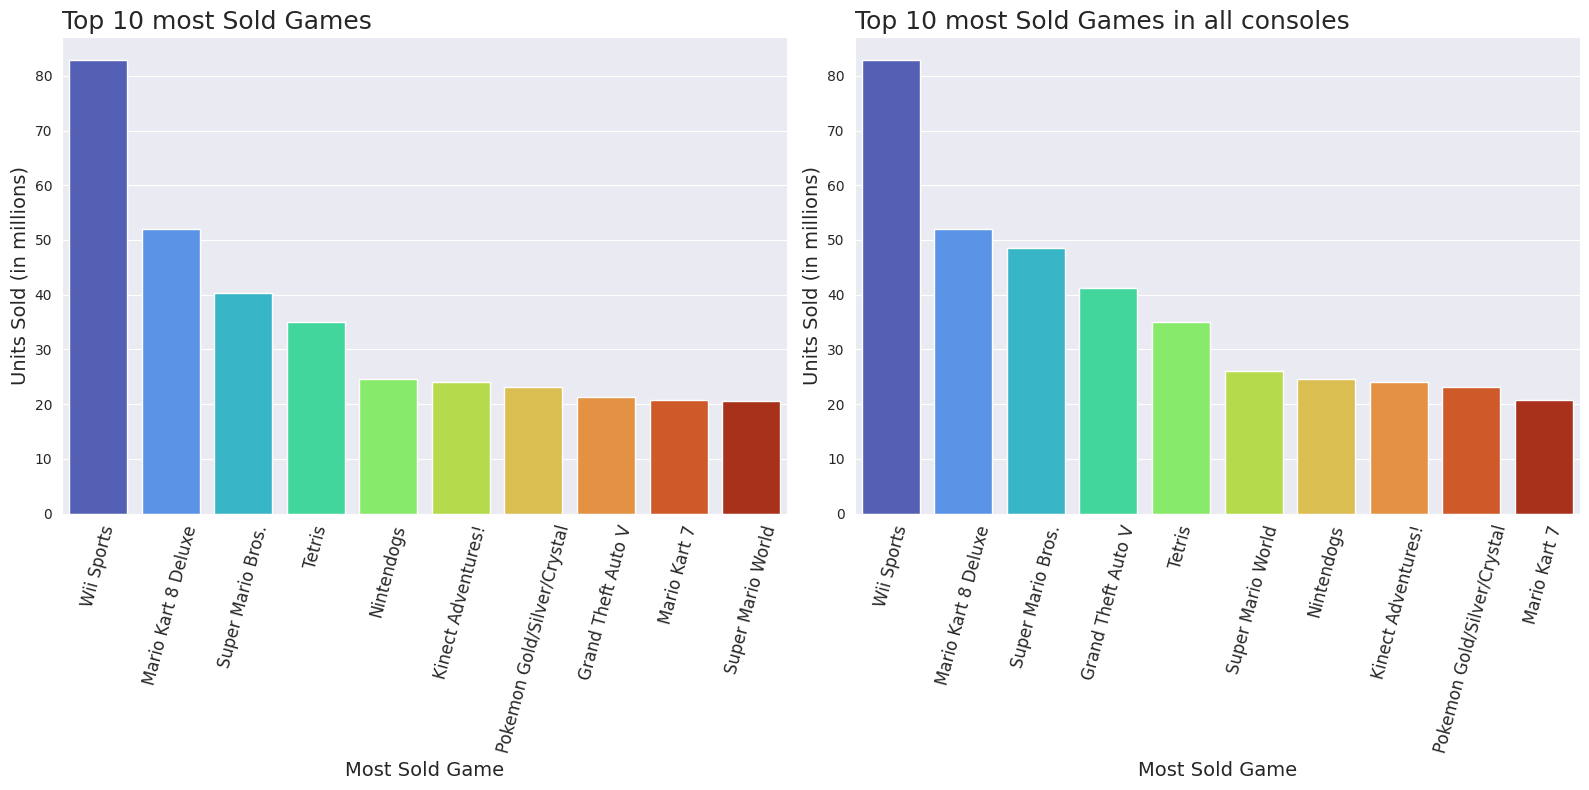

In [149]:
#Just for the record, let's plot they side-by-side for comparasion
plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)  # row 1, column 2, count 1
ax = sns.barplot(data = top_10_games, x='Most Sold Game', y='Units Sold (in millions)')
ax.set_title('Top 10 most Sold Games', fontsize=18, loc='left')
ax.set_ylabel('Units Sold (in millions)', fontsize=14)
ax.set_xlabel('Most Sold Game', fontsize=14)
plt.xticks(fontsize = 12,rotation =75)
ax=ax
 
# using subplot function and creating plot two
# row 1, column 2, count 2
plt.subplot(1, 2, 2)
 
# g is for green color
ax2 = sns.barplot(data = top_10_games_sum, x='Most Sold Game', y='Units Sold (in millions)')
ax2.set_title('Top 10 most Sold Games in all consoles', fontsize=18, loc='left')
ax2.set_ylabel('Units Sold (in millions)', fontsize=14)
ax2.set_xlabel('Most Sold Game', fontsize=14)
plt.xticks(fontsize = 12, rotation =75)
ax2=ax2

plt.tight_layout()

In [150]:
#Plotting a pie graph to compare which company sold more games
#It'll be necessary to create a new column 'Company'
#Use chatGPT to generate a dict for this, and then plot the graph 
companies = {'PlayStation 2': 'Sony',
            'Nintendo DS': 'Nintendo',
            'Nintendo Switch': 'Nintendo',
            'Game Boy': 'Nintendo',
            'Game Boy Color': 'Nintendo',
            'PlayStation 4': 'Sony',
            'PlayStation': 'Sony',
            'Wii': 'Nintendo',
            'PlayStation 3': 'Sony',
            'Xbox 360': 'Microsoft',
            'Game Boy Advance': 'Nintendo',
            'PlayStation Portable': 'Sony',
            'Nintendo 3DS': 'Nintendo',
            'NES/Famicom': 'Nintendo',
            'Xbox One': 'Microsoft',
            'SNES/Super Famicom': 'Nintendo',
            'Game & Watch': 'Nintendo',
            'Nintendo 64': 'Nintendo',
            'Sega Genesis/Mega Drive': 'Sega',
            'PlayStation 5': 'Sony',
            'Atari 2600': 'Atari',
            'Xbox': 'Microsoft',
            'GameCube': 'Nintendo',
            'Xbox Series X/S': 'Microsoft',
            'Wii U': 'Nintendo',
            'PlayStation Vita': 'Sony',
            'Sega Master System': 'Sega',
            'Sega Game Gear': 'Sega',
            'PC Engine/TurboGrafx-16': 'NEC',
            'Sega Saturn': 'Sega',
            'Dreamcast': 'Sega',
            'Master System (Brazilian)': 'Sega',
            'Dendy (Famiclone)': 'Dendy',
            'Super NES Classic Edition': 'Nintendo',
            'Famicom Disk System': 'Nintendo',
            'NES Classic Edition': 'Nintendo',
            'WonderSwan': 'Bandai',
            'Sega Pico': 'Sega',
            'Color TV-Game': 'Nintendo',
            'Intellivision': 'Mattel Electronics',
            'Mega Drive (Brazilian)': 'Tectoy',
            'N-Gage': 'Nokia',
            'Sega CD': 'Sega',
            'ColecoVision': 'Coleco',
            'Magnavox Odyssey': 'Magnavox',
            'PC Engine CD-ROM': 'NEC',
            'Atari 7800': 'Atari',
            'Atari Lynx': 'Atari',
            'Philips CD-i': 'Philips',
            'Telstar': 'Coleco',
            'Atari 5200': 'Atari'}

In [151]:
games['Company'] = games['Console'].map(companies)
games = games[['Console', 'Company','Most Sold Game','Units Sold (in millions)', 'Year of Release (Game)','Extra Information']]
games.drop(['Extra Information'], axis=1, inplace=True)
games.head(10)

,Console,Company,Most Sold Game,Units Sold (in millions),Year of Release (Game)
0,PlayStation 2,Sony,Grand Theft Auto: San Andreas,17.33,2004
1,Nintendo DS,Nintendo,Nintendogs,24.67,2005
2,Nintendo Switch,Nintendo,Mario Kart 8 Deluxe,52.00,2017
3,Game Boy,Nintendo,Tetris,35.00,1989
4,Game Boy Color,Nintendo,Pokemon Gold/Silver/Crystal (1999-2000),23.10,1999
5,PlayStation 4,Sony,Grand Theft Auto V,20.00,2013
6,PlayStation,Sony,Gran Turismo,10.85,1997
7,Wii,Nintendo,Wii Sports,82.88,2006
8,PlayStation 3,Sony,Grand Theft Auto V,21.30,2013
9,Xbox 360,Microsoft,Kinect Adventures!,24.00,2010


In [152]:
#Creating a Dataframe for the companies with the largest number of consoles
company_count = games['Company'].value_counts().to_frame().reset_index()
#Changing the company's name to 'Others' if the value is equals to 1
company_count['Company'] = company_count['Company'].replace(company_count[company_count['count'] == 1]['Company'].tolist(), 'Others')

#Grouping 
grouped = company_count.groupby('Company').sum().reset_index()
grouped.Company.to_list()


['Atari', 'Coleco', 'Microsoft', 'NEC', 'Nintendo', 'Others', 'Sega', 'Sony']

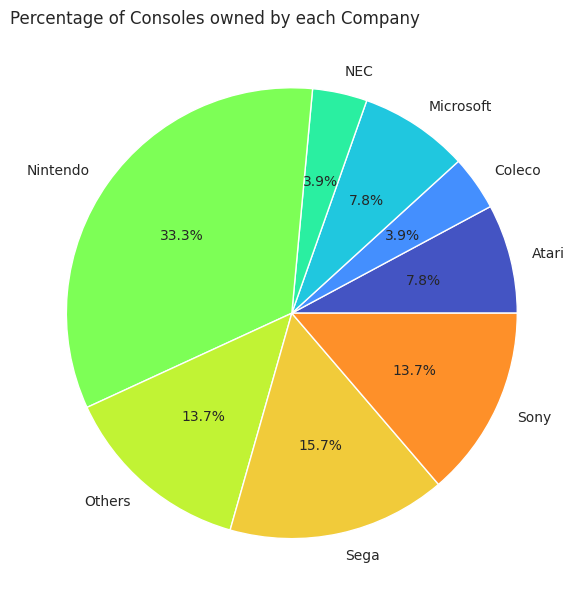

In [153]:
#Use subplots
plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1) 
labels = ['Atari', 'Coleco', 'Microsoft', 'NEC', 'Nintendo', 'Others', 'Sega', 'Sony']
ax = plt.pie(grouped['count'], labels=labels, autopct='%1.1f%%')
plt.title('Percentage of Consoles owned by each Company', loc='left')
plt.show()

In [155]:
#Which year was the best for selling games?
year = games.groupby('Year of Release (Game)')['Units Sold (in millions)'].mean().reset_index().sort_values(by='Units Sold (in millions)',ascending=False)
best_year = games.groupby('Year of Release (Game)')['Units Sold (in millions)'].mean().reset_index().sort_values(by='Units Sold (in millions)',ascending=False).head(10)
best_year_sorted = best_year.sort_values(by='Year of Release (Game)',ascending=False)

In [156]:
games['Year of Release (Game)'].value_counts().head(16)

Year of Release (Game)
1989    4
2004    3
1992    3
1985    2
1982    2
1993    2
1977    2
1986    2
2005    2
1980    2
1990    2
2020    2
2017    2
1999    2
2013    2
2011    1
Name: count, dtype: int64

In [157]:
#There were several consoles in some years, each one with the same or a different games as the most sold
games.loc[games['Year of Release (Game)'] == 1989]

,Console,Company,Most Sold Game,Units Sold (in millions),Year of Release (Game)
3,Game Boy,Nintendo,Tetris,35.0,1989
31,Master System (Brazilian),Sega,Alex Kidd in Miracle World,0.5,1989
45,PC Engine CD-ROM,NEC,Tengai Maky?: Ziria,0.8,1989
47,Atari Lynx,Atari,California Games,0.5,1989


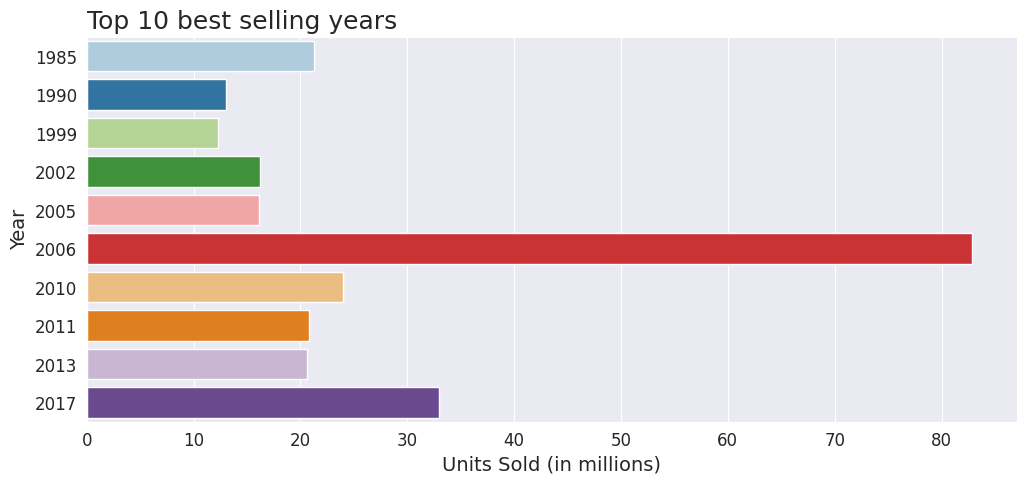

In [158]:
plt.figure(figsize=(12,5))
ax = sns.barplot(data = best_year_sorted, x='Units Sold (in millions)', y='Year of Release (Game)', orient='h', palette='Paired')
ax.set_title('Top 10 best selling years', fontsize=18, loc='left')
ax.set_ylabel('Year', fontsize=14)
ax.set_xlabel('Units Sold (in millions)', fontsize=14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
ax=ax

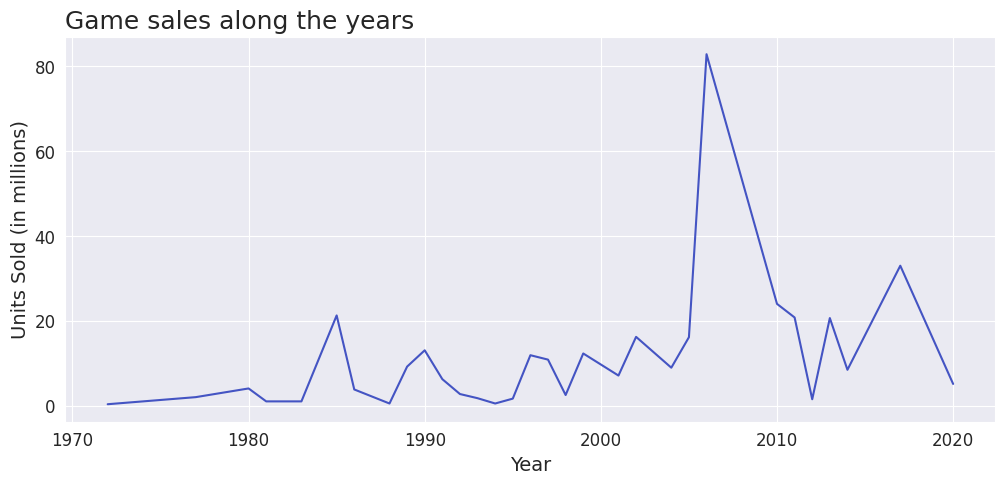

In [159]:
plt.figure(figsize=(12,5))
ax = sns.lineplot(data = year, x='Year of Release (Game)', y='Units Sold (in millions)')
ax.set_title('Game sales along the years', fontsize=18, loc='left')
ax.set_ylabel('Units Sold (in millions)', fontsize=14)
ax.set_xlabel('Year', fontsize=14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
ax=ax